In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

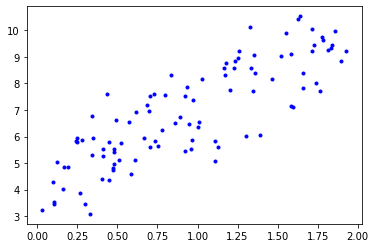

In [3]:
plt.plot(X,y,"b.")
plt.show()

In [4]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.16489359]
 [2.89064972]]


In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[4.16489359]
 [9.94619304]]


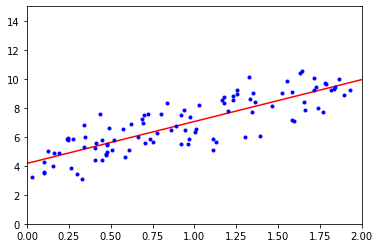

In [6]:
plt.plot(X_new, y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)

[4.16489359] [[2.89064972]]


array([[4.16489359],
       [9.94619304]])

In [8]:
alpha=0.1
n_iterations=1000
m=100
theta=np.random.randn(2,1)

In [9]:
for iteration in range(n_iterations):
  gradients  =2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta=theta-alpha*gradients
print(theta)

[[4.16489359]
 [2.89064972]]


In [11]:
def plot_gradient_descent(theta,alpha):
  m=len(X_b)
  plt.plot(X,y,"b.")#scatterplot
  n_iterations=1000
  for iteration in range(n_iterations):
    if iteration < 10:#plotthelinesforthefirst10iterations
      y_predict = X_new_b.dot(theta)
      style="b-" if iteration > 0 else "r--" 
      plt.plot(X_new,y_predict,style)
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta-alpha*gradients
  plt.xlabel("$x_1$",fontsize=18)
  plt.axis([0,2,0,15])
  plt.title(r"$\alpha={}$".format(alpha),fontsize=16)

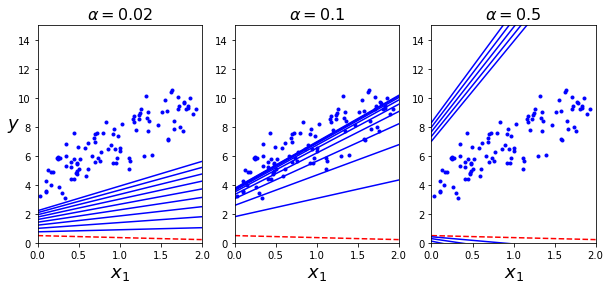

In [13]:
np.random.seed(42)
theta=np.random.randn(2,1)#randominitialization
plt.figure(figsize=(10,4))
plt.subplot(131);
plot_gradient_descent(theta,alpha=0.02)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.subplot(132);
plot_gradient_descent(theta,alpha=0.1)
plt.subplot(133);
plot_gradient_descent(theta,alpha=0.5)
plt.show()

In [16]:
n_epochs=50
t0,t1=5,50

def learning_schedule(t):
  return t0/(t+t1)

theta=np.random.randn(2,1)#randominitialization
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta-eta*gradients

In [17]:
from sklearn.linear_model import SGDRegressor 
sgd_reg = SGDRegressor(max_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

print(sgd_reg.intercept_,sgd_reg.coef_)

[4.13531709] [2.85244534]
